# Life Expectancy GDP
Introduction
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?
What is the distribution of that life expectancy?
Data sources

GDP Source: World Bank national accounts data, and OECD National Accounts data files.
Life expectancy Data Source: World Health Organization
Import Python Modules
First import the preliminary modules that will be used in this project:

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

In [25]:
sns.set_theme(style='whitegrid', palette='Set1')
%matplotlib inline

# Loading the Data
To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here all_data.csv will be read in into a DataFrame called df, followed by a quick inspection of the DataFrame using .head() to check its contents.

In [26]:
gdp = pd.read_csv("all_data.csv")
gdp.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Country - nation
Year - the year for the observation
Life expectancy at birth (years) - life expectancy value in years
GDP - Gross Domestic Product in U.S. dollars
Another check of the shape of df is performed. It seems that there are 96 observations or rows and 4 columns.

In [27]:
print(gdp.shape)

(96, 4)


In [28]:
print(gdp.describe(include="all"))

       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%        NaN  2003.750000                         74.475000  1.733018e+11
50%        NaN  2007.500000                         76.750000  1.280220e+12
75%        NaN  2011.250000                         78.900000  4.067510e+12
max        NaN  2015.000000                         81.000000  1.810000e+13


# Cleaning Column Name
Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! Life expectancy at birth (years) is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The rename function is used to change the column name to LEABY.

In [29]:
# rename columns

print(gdp.rename(columns = {
    'Life expectancy at birth (years)':'LEABY'
}, inplace=True))

None


# Explore the Data
First, more needs to be explored about the countries that are represented in df. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [30]:
print(gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [31]:
gdp.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

# Exploratory Plots
Exploring data through plots can sometimes be much more effective, below the distribution of GDP is being shown. The distribution of GDP in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name. More about the power law can be read here.

Text(0.5, 0, 'GDP in Trillions of U.S Dollars')

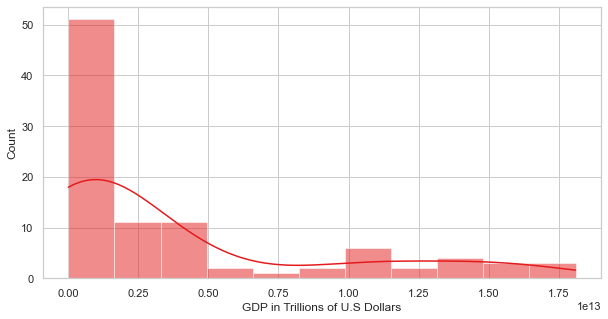

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(data=gdp, x='GDP', kde=True, linewidth=.5)
plt.xlabel('GDP in Trillions of U.S Dollars')

Next the distribution of LEABY (Life expectancy at birth (years)) was examined. The distribution of LEABY in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the GDP column. A further look might also identify different modes or smaller groupings of distributions within the range.

Text(0.5, 0, 'Life expectancy at birth (years)')

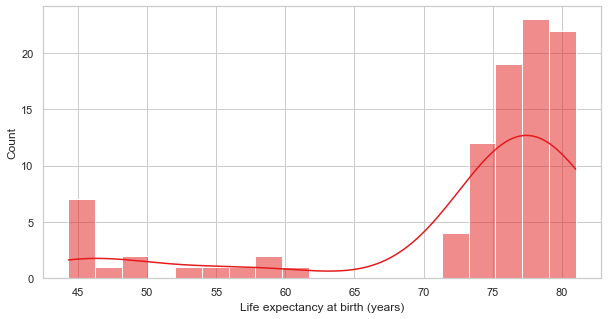

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(gdp, x='LEABY', kde=True)
plt.xlabel('Life expectancy at birth (years)')

The previous plots did not break up the data by countries, so the next task will be to find the average LEABY and GDP by country.

In [38]:
gdp_mean = gdp.drop('Year', axis=1).groupby('Country').mean().reset_index()
gdp_mean

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that they are broken down by Country and the average values for LEEABY and GDP are created, bar plots showing the mean values for each variable are created below.

The first plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

Text(0.5, 0, 'Life expectancy at birth (years)')

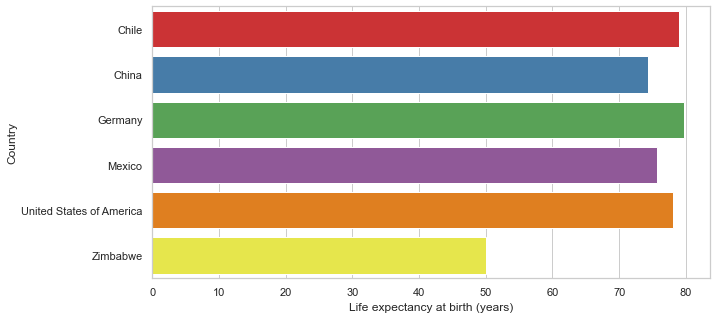

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=gdp_mean, x='LEABY', y='Country')
plt.xlabel('Life expectancy at birth (years)')


For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

Text(0.5, 0, 'GDP in Trillions of U.S Dollars')

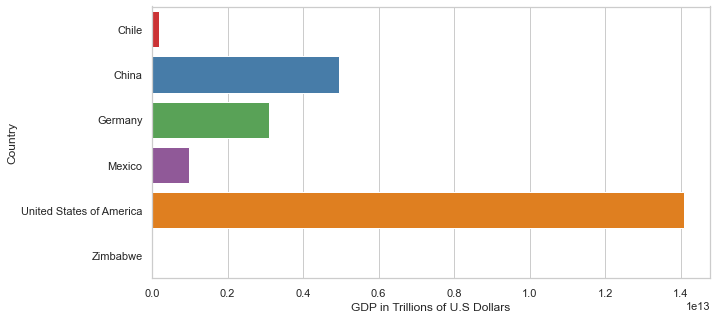

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=gdp_mean, x='GDP', y='Country')
plt.xlabel('GDP in Trillions of U.S Dollars')

# Violin Plots
Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes.

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the y-axis and the distribution of numeric columns : GDP and LEABY are on the x axis.

In the GDP plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.

In the LEABY plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

Text(0.5, 0, 'Life expectancy at birth (years)')

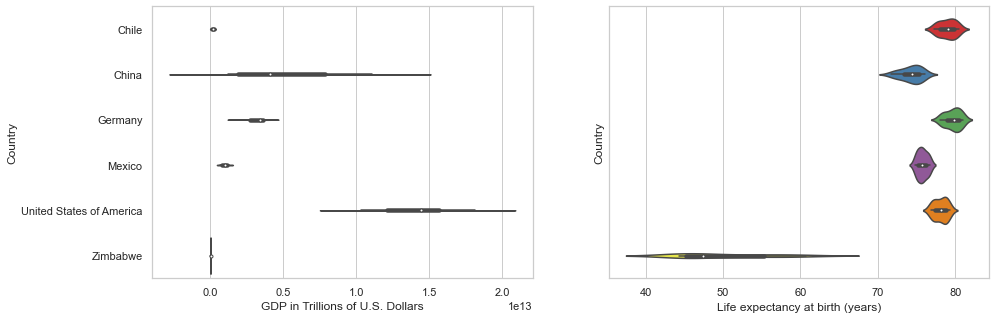

In [43]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=gdp.GDP, y=gdp.Country)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=gdp.LEABY, y=gdp.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')

# Swarm Plots
Another newer method for showing distributions is the swarm plot, and they can be used to complement the box and violin plots. First the stand alone swarm plot is shown and then overlayed on top of a violin plot. Swarm plots are useful because they show dot density around the values as well as distribution through area/shape.

In the case of of the GDP plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations.

C:\Users\nwaok\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Life expectancy at birth (years)')

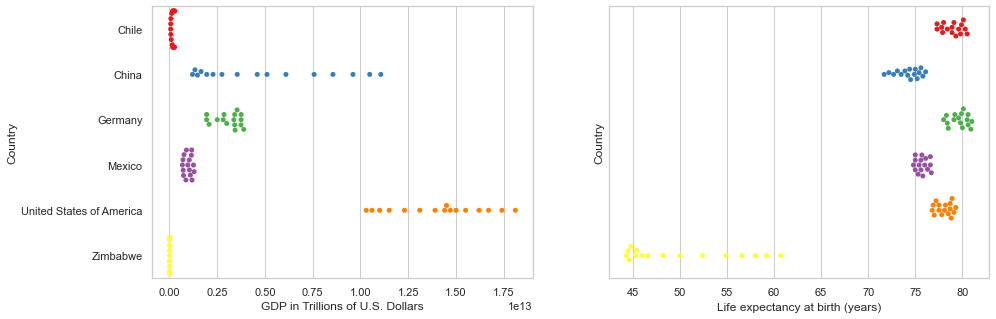

In [44]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.swarmplot(ax=axes[0], x=gdp.GDP, y=gdp.Country)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.swarmplot(ax=axes[1], x=gdp.LEABY, y=gdp.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')

C:\Users\nwaok\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nwaok\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Life expectancy at birth (years)')

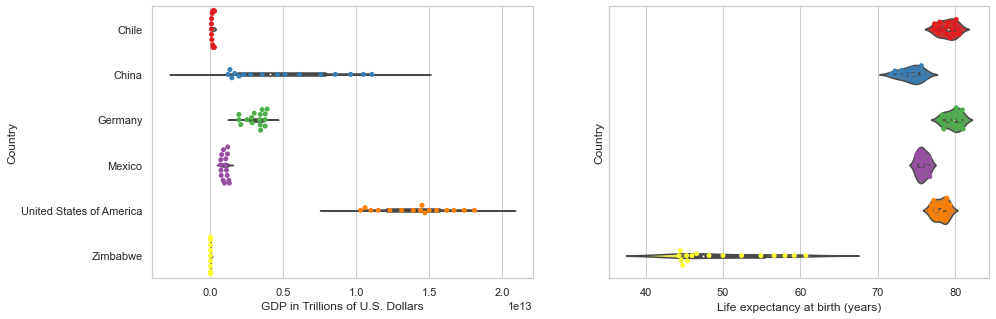

In [45]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=gdp.GDP, y=gdp.Country)
axes[0] = sns.swarmplot(ax=axes[0], x=gdp.GDP, y=gdp.Country)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=gdp.LEABY, y=gdp.Country)
axes[1] = sns.swarmplot(ax=axes[1], x=gdp.LEABY, y=gdp.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')

# Line Charts
Next the data will explore GDP and LEABY over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

Text(0, 0.5, 'GDP in Trillions of U.S.Dollars')

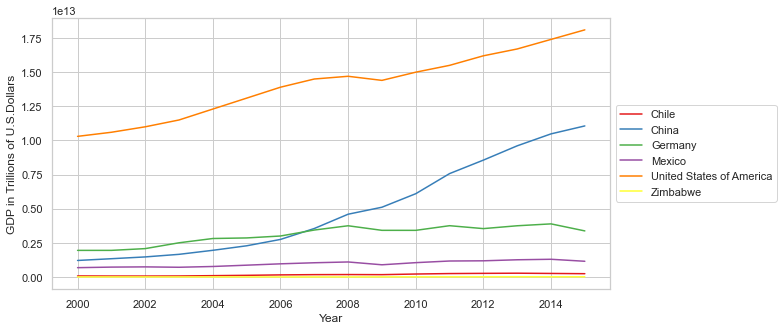

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=gdp, x='Year', y='GDP', hue='Country')
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of U.S.Dollars')

Another aspect that was looked more into depth was the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their GDP over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

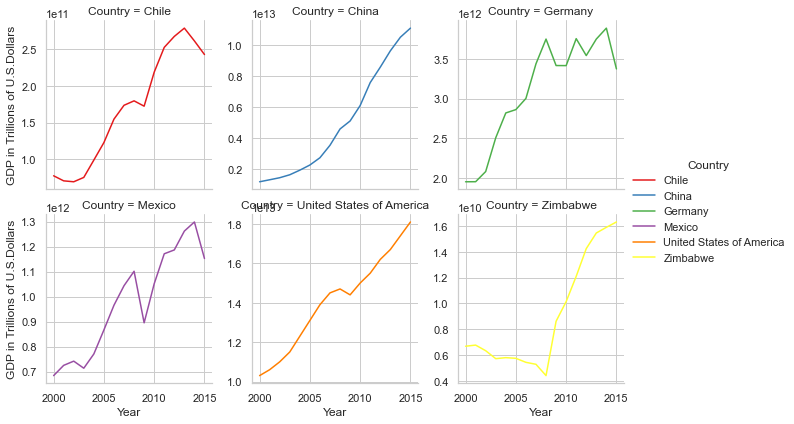

In [50]:
gGDP = sns.FacetGrid(gdp, col='Country', col_wrap=3,
                hue='Country', sharey=False)

gGDP = (gGDP.map(sns.lineplot,'Year','GDP')
     .add_legend()
     .set_axis_labels('Year', 'GDP in Trillions of U.S.Dollars'))



The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2005.

Text(0, 0.5, 'GDP in Trillions of U.S.Dollars')

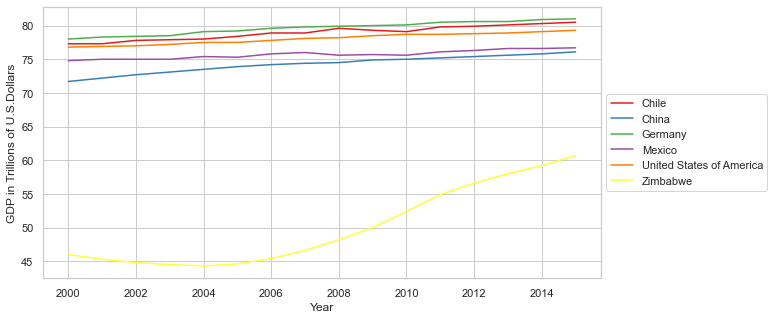

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(data=gdp, x='Year', y='LEABY', hue='Country')
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of U.S.Dollars')

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

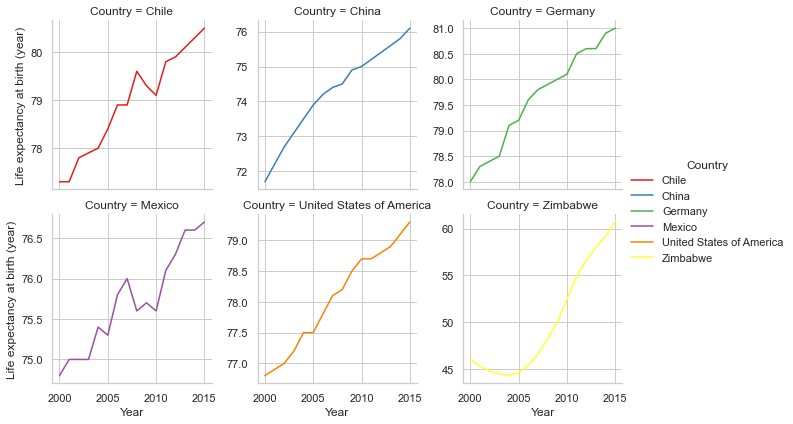

In [52]:
gLEABY = sns.FacetGrid(gdp, col='Country', col_wrap=3,
                hue='Country', sharey=False)

gLEABY = (gLEABY.map(sns.lineplot,'Year','LEABY')
     .add_legend()
     .set_axis_labels('Year', 'Life expectancy at birth (year)'))

# Scatter Plot
The next two charts will explore the relationship between GDP and LEABY. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

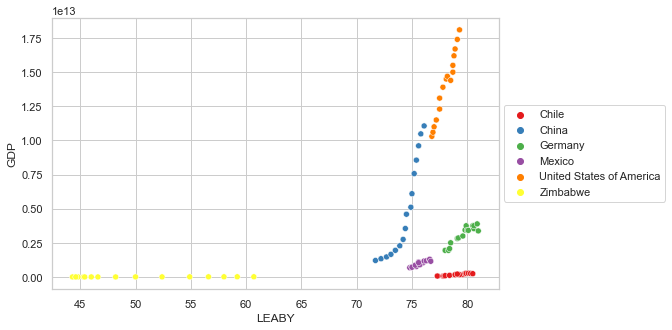

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=gdp, x='LEABY', y='GDP', hue='Country').legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

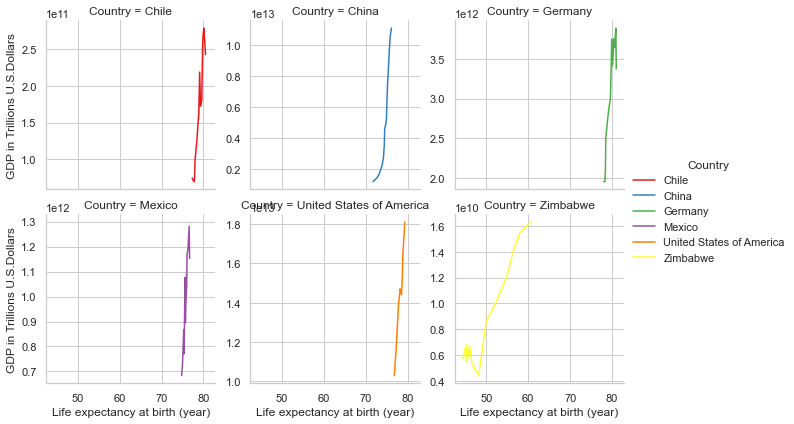

In [55]:
g = sns.FacetGrid(gdp, col='Country', col_wrap=3,
                hue='Country', sharey=False)

g = (g.map(sns.lineplot,'LEABY','GDP')
     .add_legend()
     .set_axis_labels('Life expectancy at birth (year)', 'GDP in Trillions U.S.Dollars'))

Conclusions
This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

The project was also able to answer some of the questions posed in the beginning:

Has life expectancy increased over time in the six nations? Yes with Zimbabwe having the greatest increase.
Has GDP increased over time in the six nations? GDP has also increased for all countries in our list, especially for China.
Is there a correlation between GDP and life expectancy of a country? Yes there is a positive correlation between GDP and life expectancy for countries in our list.
What is the average life expectancy in these nations? Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
What is the distribution of that life expectancy? the life expectancy had a left skew, or most of the observations were on the right side.
Further Research
The study wanted to explore what happened in China in the past 10 years that caused the GDP to increase so drastically.

This [Forbes article] (https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/?sh=45d412053f13) describes China's unmatched GDP growth in the past decades were due to it's large population, newly available capital and manufacturing efficiency. The study can ascertain that the findings in the data matches the real world findings for GDP growth in China.